<a href="https://colab.research.google.com/github/JuanCamiloGB/Signals-and-Systems/blob/master/Taller01/4.%20Discretizaci%C3%B3n%20de%20se%C3%B1ales%20cosenoidales/Ejercicio_Simular_el_Proceso_de_discretizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#4. Discretización de señales cosenoidales

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import matlib as mb
from scipy.spatial import distance

###a) Se pretende muestrear la señal  
$$x(t)=10cos(\Omega t);  t\in[0,T];  \Omega=2\pi F;  F=1/T; F=50 Hz $$ 
###Se emplea un sistema de discretización con frecuencia de muestreo 
$$ Fs=80Hz$$
###estime la señal capturada. Realice una simulación en Python del proceso de discretización.


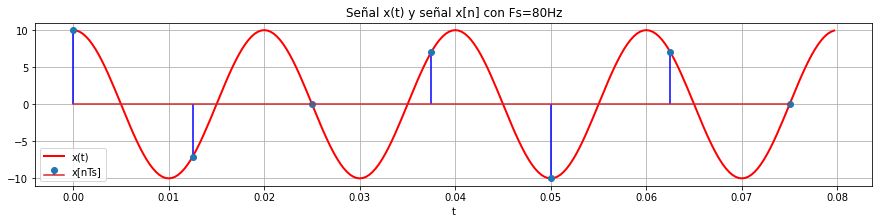

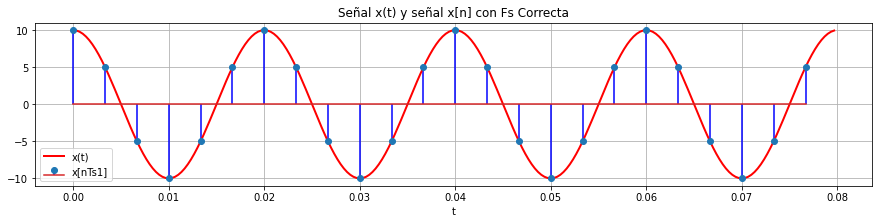

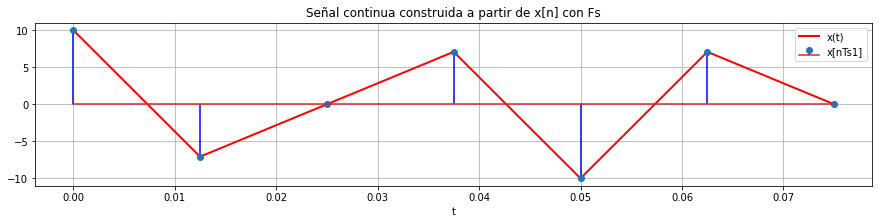

In [70]:
"""Solución"""
A=10
F=50
T=1/F
Fs=80
Ts=1/Fs
Fn=300 #10*(30) 
Tn=1/Fn
Fc=10*Fn
Tc=1/Fc

wo=2*np.pi*(F)
t = np.arange(0,4*T,Tc) #tiempo continuo
xt=A*np.cos(wo*t)
tn = np.arange(0,4*T,Tn) #tiempo discreto
xn=A*np.cos(wo*tn)  #x[n] discreta con Fs
ts=np.arange(0,4*T,Ts)
xs=A*np.cos(wo*ts)   # x[n] discreta con Fn



Fc1=Fs
Tc1=1/Fc1
tc = np.arange(0,4*T,Tc1) #señal en continua construida a partir de x[n] con Fs
xc=A*np.cos(2*np.pi*F*tc)

plt.figure(figsize=(15, 3))
plt.plot(t,xt,'r',linewidth=2,label="x(t)")  #señal continua
plt.stem(ts,xs,'b',label='x[nTs]', use_line_collection = True) #señal diiscretizada con Fs = 80Hz
plt.title("Señal x(t) y señal x[n] con Fs=80Hz")
plt.legend()
plt.xlabel('t')
plt.grid()
plt.show()
plt.figure(figsize=(15, 3))
plt.plot(t,xt,'r',linewidth=2,label="x(t)")  #señal continua
plt.stem(tn,xn,'b',label='x[nTs1]', use_line_collection = True) #señal diiscretizada con Fs correcta
plt.title("Señal x(t) y señal x[n] con Fs Correcta")
plt.grid()
plt.legend()
plt.xlabel('t')
plt.show()
plt.figure(figsize=(15, 3))
plt.plot(tc,xc,'r',linewidth=2,label="x(t)")  #señal continua
plt.stem(ts,xs,'b',label='x[nTs1]', use_line_collection = True) #señal diiscretizada con Fs=80Hz
plt.title("Señal continua construida a partir de x[n] con Fs")
plt.grid()
plt.legend()
plt.xlabel('t')
plt.show()


###Se tiene un microprocesador de 4 bits con entrada análoga entre -3.3 y 3.3 [v]. Describa las condiciones necesarias para que el microprocesador pueda digitalizarla señal 
$$x(t)=30cos(100\pi t)\ $$ 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning 

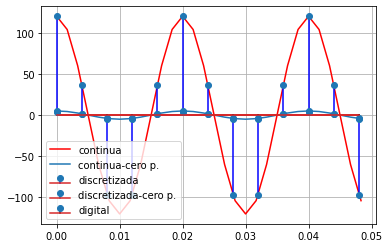

In [69]:
''' Funciones '''

def my_ceropen(x,ymin = -5, ymax = 5): #en general se pueden definir valores por defecto 
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv

def my_disc(ti,tf,Fs):
  tvd = np.arange(ti,tf,1/Fs) #vector de datos en tiempo
  return tvd

def my_cuantizador(xd_cp,nbits,rmin,rmax):
  ve = np.linspace(rmin,rmax,2**nbits)#vector de estados
  d = distance.cdist(xd_cp.reshape(-1,1),ve.reshape(-1,1)) #distancia entre cada elemento de xd_cp y cada estado en ve
  ind = np.argmin(d,axis=1)#buscar min sobre columnas (distancia x[i] contra todos los estados en ve)
  xq = np.zeros(ind.shape[0]) #inicializar xq con ceros
  for i in range(ind.shape[0]):
    xq[i] = ve[ind[i]]#asignando a xq[i] el valor en ve mas cercano a xd_cp[i]
  
  return xq 
''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''

A = 120 #amplitud
To = 1/60 # periodo función cos
Fo = 50 #frecuencia = 50
Fs = 10*(F_o) #frecuencia de muestreo Fs>10Fo
ti = 0 #tiempo inicial
tf = 3*To #tiempo final
Ts = 1/Fs #periodo de muestreo
tc = my_disc(ti,tf,Fs) #vector de datos en tiempo
xc = A * np.cos(2*np.pi*Fo*tc) #vector de 10F

#cero y pendiente
xccp = my_ceropen(xc,ymin = -5, ymax = 5)

#discretización
tvd = my_disc(ti,tf,Fs=5*Fo) #vector discretizacion
xd = A*np.cos(2*np.pi*Fo*tvd) 
xdcp = my_ceropen(xd,ymin = -5, ymax = 5)

#cuantizar
nbits = 4
rmin = -3.3
rmax = 3.3
xq = my_cuantizador(xdcp,nbits,rmin,rmax)

plt.plot(tc,xc,'r',label='continua')
plt.plot(tc,xccp,label='continua-cero p.')
plt.stem(tvd,xd,'b',label='discretizada')
plt.stem(tvd,xdcp,label='discretizada-cero p.')
plt.stem(tvd,xq,'k',label='digital')
plt.grid()
plt.legend()
plt.show()

###Se tiene un sistema de discretización con frecuencia de muestreo 
$$Fs=40Hz$$ 
###aplicado a las señales
$$x_1(t)=cos(20\pi t)\hspace{2mm}y\hspace{2mm}x_2(t)=cos(100\pi t)$$
###Implemente una simulación en Python del proceso de discretización.

### Cuál es la frecuencia de muestreo límite apropiada para discretizar la señal
$$x(t) = 3 cos(1000\pi t) + 5 sin(6000\pi t) + 10 cos(14000\pi t)$$
###Si se utiliza una frecuencia de muestreo de
$$ 5kHz $$
###cuál es la señal discreta obtenida?

###Demuestre que funciones cosenoidales con frecuencia de oscilación 
$$ Fk = Fo + kFs; t\in Z$$
###No son distinguibles de la funcion 
$$Cos(2\pi Fot)$$
###al utilizar un sistema de discretización con frecuencia de muestreo
$$Fs$$
###Realice simulaciones para
$$K\in [0,\pm 1,\pm 2,\pm 3]$$